In [7]:
import pandas as pd
df=pd.read_csv('df_clean2.csv')


In [8]:
df.head()

,Sev,StartLat,StartLng,Dist(mi),DfTyp(mins),DfFF(mins),CongSp,City,County,State,...,Vis(mi),WindDir,StartTime,EndTime,Precip(in),Year,Month,Day,TOD,Season
0,0,40.119274,-83.03465,1.8,0,1,Fast,Columbus,Franklin,OH,...,7.0,NW,12:42:00,13:16:05,0.00,2016,2,8,Afternoon,Winter
1,0,40.119274,-83.03465,1.8,0,1,Fast,Columbus,Franklin,OH,...,7.0,NW,12:42:00,13:16:05,0.02,2016,2,8,Afternoon,Winter
2,0,40.119274,-83.03465,1.8,0,1,Fast,Columbus,Franklin,OH,...,7.0,NW,12:42:00,13:16:05,0.02,2016,2,8,Afternoon,Winter
3,0,40.119274,-83.03465,1.8,0,1,Fast,Columbus,Franklin,OH,...,7.0,NW,12:42:00,13:16:05,0.03,2016,2,8,Afternoon,Winter
4,0,40.119274,-83.03465,1.8,0,1,Fast,Columbus,Franklin,OH,...,7.0,NW,12:42:00,13:16:05,0.00,2016,2,8,Afternoon,Winter


In [12]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617856 entries, 0 to 4617855
Data columns (total 25 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Sev          int64  
 1   StartLat     float64
 2   StartLng     float64
 3   Dist(mi)     float64
 4   DfTyp(mins)  int64  
 5   DfFF(mins)   int64  
 6   CongSp       object 
 7   City         object 
 8   County       object 
 9   State        object 
 10  ZipCode      int64  
 11  TimeZone     object 
 12  Temp(F)      float64
 13  Hum(%)       int64  
 14  Pres(in)     float64
 15  Vis(mi)      float64
 16  WindDir      object 
 17  StartTime    object 
 18  EndTime      object 
 19  Precip(in)   float64
 20  Year         int64  
 21  Month        int64  
 22  Day          int64  
 23  TOD          object 
 24  Season       object 
dtypes: float64(7), int64(8), object(10)
memory usage: 880.8+ MB


In [14]:
print(max(df['DfFF(mins)'])*.10)
print(max(df['DfTyp(mins)'])*.10)
print(max(df['Precip(in)'])*.10)
print(max(df['Hum(%)'])*.10)
print(max(df['Pres(in)'])*.10)
print(max(df['Vis(mi)'])*.10)

27.0
26.700000000000003
9.600000000000001
10.0
3.9890000000000003
2400.7000000000003


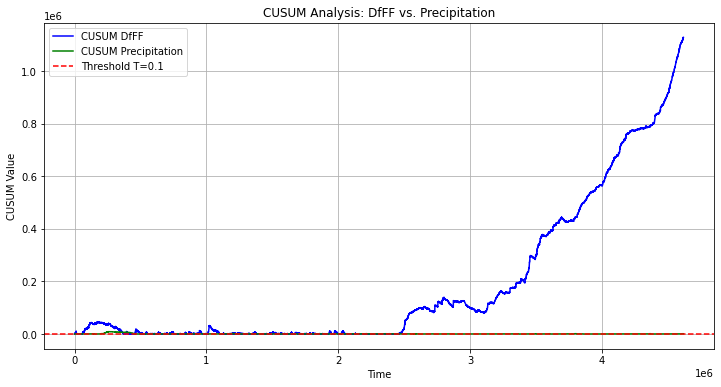

In [17]:
# Example reference value for distance traveled (mean distance)
reference_distance = df['DfFF(mins)'].mean()

# Calculate deviations from the reference value for distance traveled
deviations_distance = df['DfFF(mins)'] - reference_distance

# Example reference value for precipitation (mean precipitation)
reference_precipitation = df['Precip(in)'].mean()

# Calculate deviations from the reference value for precipitation
deviations_precipitation = df['Precip(in)'] - reference_precipitation

# Choose appropriate threshold and stabilizer values for CUSUM analysis
T = .1  # Example threshold
c = 0.1  # Example stabilizer

# Initialize CUSUM values for distance traveled and precipitation
cusum_distance = np.zeros(len(df))
cusum_precipitation = np.zeros(len(df))

# Calculate CUSUM values for distance traveled
for i in range(1, len(df)):
    cusum_distance[i] = max(0, cusum_distance[i-1] + deviations_distance[i] - c)

# Calculate CUSUM values for precipitation
for i in range(1, len(df)):
    cusum_precipitation[i] = max(0, cusum_precipitation[i-1] + deviations_precipitation[i] - c)

# Plot CUSUM charts for distance traveled and precipitation
plt.figure(figsize=(12, 6))
plt.plot(df.index, cusum_distance, label='CUSUM DfFF', color='blue')
plt.plot(df.index, cusum_precipitation, label='CUSUM Precipitation', color='green')
plt.axhline(y=T, color='red', linestyle='--', label=f'Threshold T={T}')
plt.xlabel('Time')
plt.ylabel('CUSUM Value')
plt.title('CUSUM Analysis: DfFF vs. Precipitation')
plt.legend()
plt.grid(True)
plt.show()

## DfFF versus Precipitation 

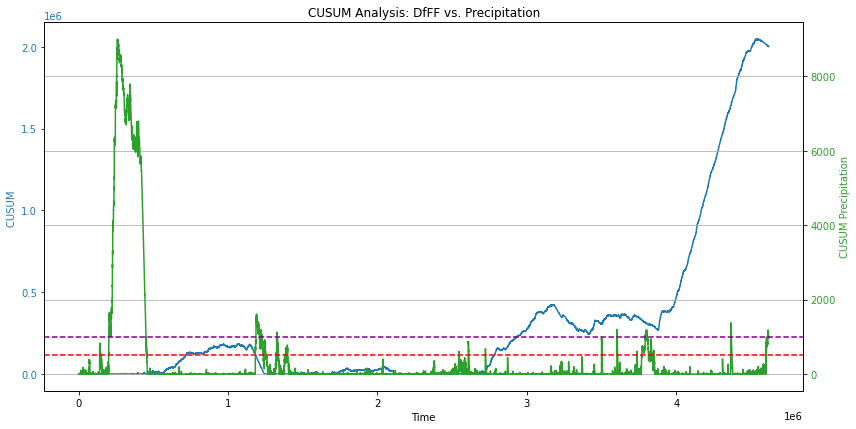

In [22]:
# Plot CUSUM charts for distance traveled and precipitation
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('CUSUM ', color=color)
ax1.plot(df.index, cusum_distance, label='DfFF', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('CUSUM Precipitation', color=color)  
ax2.plot(df.index, cusum_precipitation, label='CUSUM Precipitation', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.axhline(y=500, color='red', linestyle='--', label=f'Threshold T={T}')
plt.axhline(y=1000, color='purple', linestyle='--', label=f'Threshold T2=1000')
fig.tight_layout()  
plt.title('CUSUM Analysis: DfFF vs. Precipitation')
plt.grid(True)
plt.show()

## DfFF versus Humidity

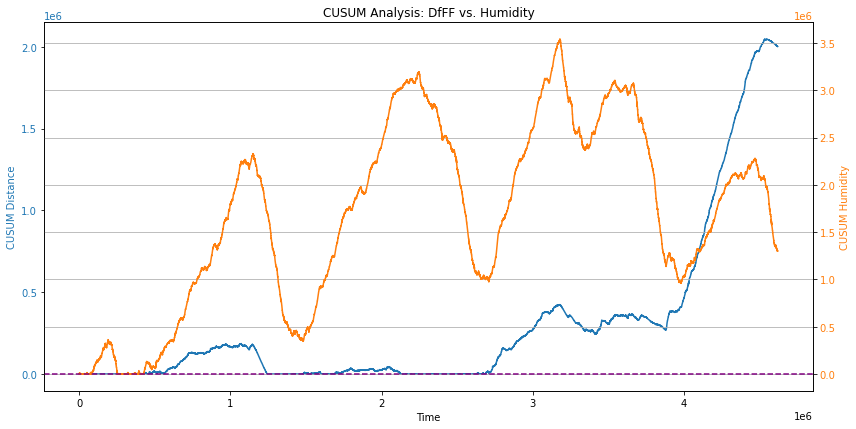

In [26]:


# Load your datasets (assuming they are already loaded into DataFrames named df_distance and df_humidity)
# Ensure both datasets have a common time index or timestamp column

# Example reference value for distance traveled (mean distance)
reference_distance = df['Dist(mi)'].mean()

# Calculate deviations from the reference value for distance traveled
deviations_distance = df['Dist(mi)'] - reference_distance

# Example reference value for humidity (mean humidity)
reference_humidity = df['Hum(%)'].mean()

# Calculate deviations from the reference value for humidity
deviations_humidity = df['Hum(%)'] - reference_humidity

# Choose appropriate threshold and stabilizer values for CUSUM analysis
T = 27  # Example threshold
c = 0.1  # Example stabilizer

# Initialize CUSUM values for distance traveled and humidity
cusum_distance = np.zeros(len(df))
cusum_humidity = np.zeros(len(df))

# Calculate CUSUM values for distance traveled
for i in range(1, len(df)):
    cusum_distance[i] = max(0, cusum_distance[i-1] + deviations_distance[i] - c)

# Calculate CUSUM values for humidity
for i in range(1, len(df)):
    cusum_humidity[i] = max(0, cusum_humidity[i-1] + deviations_humidity[i] - c)

# Plot CUSUM charts for distance traveled and humidity
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('CUSUM Distance', color=color)
ax1.plot(df.index, cusum_distance, label='CUSUM DfFF', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('CUSUM Humidity', color=color)  
ax2.plot(df.index, cusum_humidity, label='CUSUM Humidity', color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.axhline(y=1, color='purple', linestyle='--', label=f'Threshold T2=1.5')
fig.tight_layout()  
plt.title('CUSUM Analysis: DfFF vs. Humidity')
plt.grid(True)
plt.show()


## DfFF(mins) versus Pres(in)

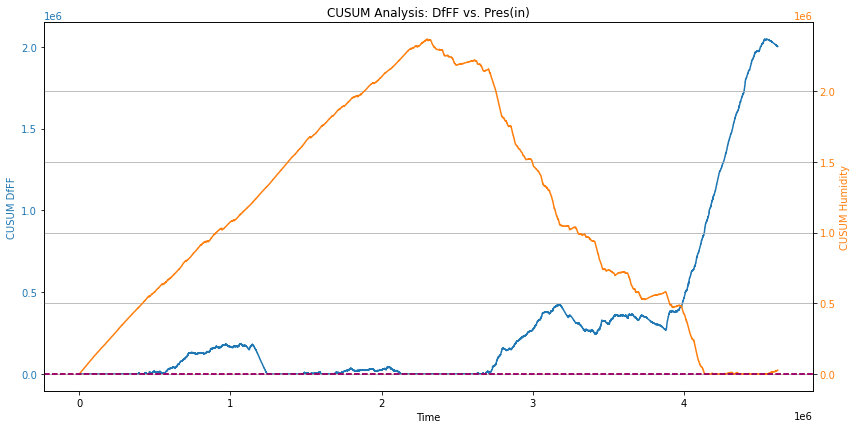

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your datasets (assuming they are already loaded into DataFrames named df_distance and df_humidity)
# Ensure both datasets have a common time index or timestamp column

# Example reference value for distance traveled (mean distance)
reference_distance = df['Dist(mi)'].mean()

# Calculate deviations from the reference value for distance traveled
deviations_distance = df['Dist(mi)'] - reference_distance

# Example reference value for humidity (mean humidity)
reference_humidity = df['Pres(in)'].mean()

# Calculate deviations from the reference value for humidity
deviations_humidity = df['Pres(in)'] - reference_humidity

# Choose appropriate threshold and stabilizer values for CUSUM analysis
T = 1  # Example threshold
c = 0.1  # Example stabilizer

# Initialize CUSUM values for distance traveled and humidity
cusum_distance = np.zeros(len(df))
cusum_humidity = np.zeros(len(df))

# Calculate CUSUM values for distance traveled
for i in range(1, len(df)):
    cusum_distance[i] = max(0, cusum_distance[i-1] + deviations_distance[i] - c)

# Calculate CUSUM values for humidity
for i in range(1, len(df)):
    cusum_humidity[i] = max(0, cusum_humidity[i-1] + deviations_humidity[i] - c)

# Plot CUSUM charts for distance traveled and humidity
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('CUSUM DfFF', color=color)
ax1.plot(df.index, cusum_distance, label='CUSUM DfFF', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('CUSUM Humidity', color=color)  
ax2.plot(df.index, cusum_humidity, label='CUSUM Humidity', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.axhline(y=.2, color='red', linestyle='--', label=f'Threshold T={T}')
plt.axhline(y=.5, color='purple', linestyle='--', label=f'Threshold T2=1.5')
fig.tight_layout()  
plt.title('CUSUM Analysis: DfFF vs. Pres(in)')
plt.grid(True)
plt.show()


## DfFF(min) versus Visability 

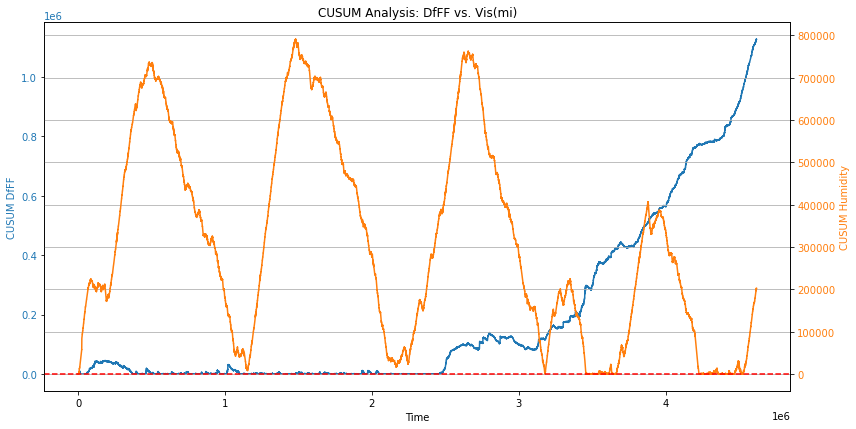

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your datasets (assuming they are already loaded into DataFrames named df_distance and df_humidity)
# Ensure both datasets have a common time index or timestamp column

# Example reference value for distance traveled (mean distance)
reference_distance = df['DfFF(mins)'].mean()

# Calculate deviations from the reference value for distance traveled
deviations_distance = df['DfFF(mins)'] - reference_distance

# Example reference value for humidity (mean humidity)
reference_humidity = df['Vis(mi)'].mean()

# Calculate deviations from the reference value for humidity
deviations_humidity = df['Vis(mi)'] - reference_humidity

# Choose appropriate threshold and stabilizer values for CUSUM analysis
T = 1  # Example threshold
c = 0.1  # Example stabilizer

# Initialize CUSUM values for distance traveled and humidity
cusum_distance = np.zeros(len(df))
cusum_humidity = np.zeros(len(df))

# Calculate CUSUM values for distance traveled
for i in range(1, len(df)):
    cusum_distance[i] = max(0, cusum_distance[i-1] + deviations_distance[i] - c)

# Calculate CUSUM values for humidity
for i in range(1, len(df)):
    cusum_humidity[i] = max(0, cusum_humidity[i-1] + deviations_humidity[i] - c)

# Plot CUSUM charts for distance traveled and humidity
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('CUSUM DfFF', color=color)
ax1.plot(df.index, cusum_distance, label='CUSUM DfFF', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('CUSUM Humidity', color=color)  
ax2.plot(df.index, cusum_humidity, label='CUSUM Humidity', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.axhline(y=T, color='red', linestyle='--', label=f'Threshold T={T}')
fig.tight_layout()  
plt.title('CUSUM Analysis: DfFF vs. Vis(mi)')
plt.grid(True)
plt.show()


## DfType versus Precipitation 

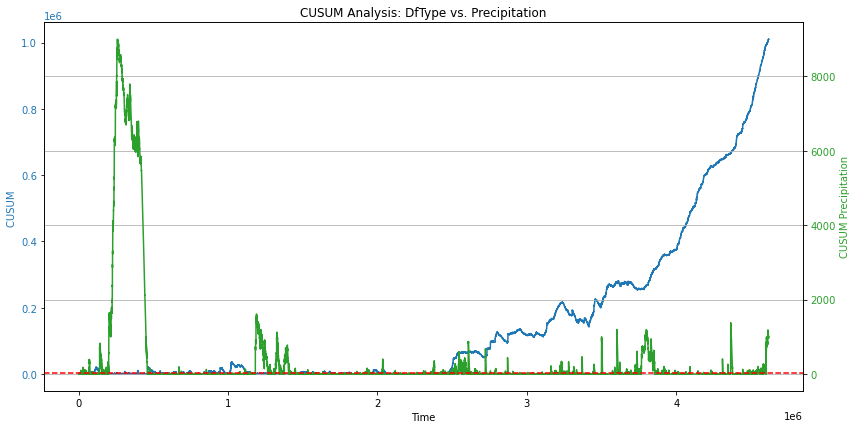

In [20]:
# Example reference value for distance traveled (mean distance)
reference_distance = df['DfTyp(mins)'].mean()

# Calculate deviations from the reference value for distance traveled
deviations_distance = df['DfTyp(mins)'] - reference_distance

# Example reference value for precipitation (mean precipitation)
reference_precipitation = df['Precip(in)'].mean()

# Calculate deviations from the reference value for precipitation
deviations_precipitation = df['Precip(in)'] - reference_precipitation

# Choose appropriate threshold and stabilizer values for CUSUM analysis
T = 27  # Example threshold
c = 0.1  # Example stabilizer

# Initialize CUSUM values for distance traveled and precipitation
cusum_distance = np.zeros(len(df))
cusum_precipitation = np.zeros(len(df))

# Calculate CUSUM values for distance traveled
for i in range(1, len(df)):
    cusum_distance[i] = max(0, cusum_distance[i-1] + deviations_distance[i] - c)

# Calculate CUSUM values for precipitation
for i in range(1, len(df)):
    cusum_precipitation[i] = max(0, cusum_precipitation[i-1] + deviations_precipitation[i] - c)

# Plot CUSUM charts for distance traveled and precipitation
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('CUSUM ', color=color)
ax1.plot(df.index, cusum_distance, label='CUSUM DfType', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('CUSUM Precipitation', color=color)  
ax2.plot(df.index, cusum_precipitation, label='CUSUM Precipitation', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.axhline(y=T, color='red', linestyle='--', label=f'Threshold T={T}')
plt.axhline(y=1000, color='purple', linestyle='--', label=f'Threshold T2=1000')
fig.tight_layout()  
plt.title('CUSUM Analysis: DfType vs. Precipitation')
plt.grid(True)
plt.show()

## DfType versus Pres(in)

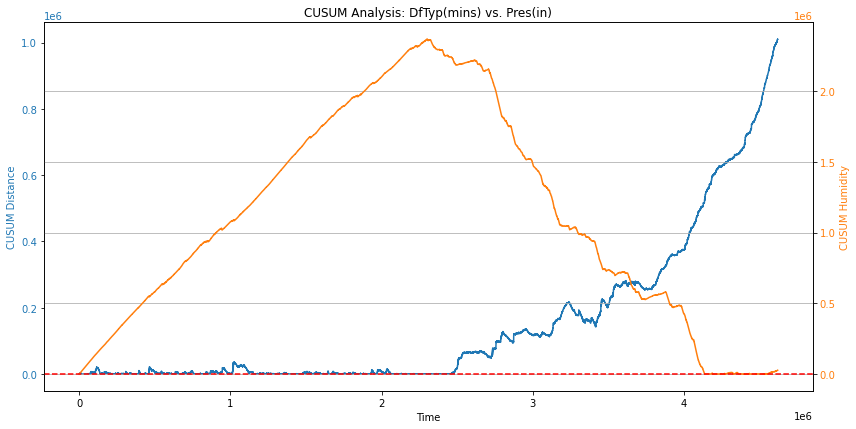

In [22]:
# Example reference value for distance traveled (mean distance)
reference_distance = df['DfTyp(mins)'].mean()

# Calculate deviations from the reference value for distance traveled
deviations_distance = df['DfTyp(mins)'] - reference_distance

# Example reference value for humidity (mean humidity)
reference_humidity = df['Pres(in)'].mean()

# Calculate deviations from the reference value for humidity
deviations_humidity = df['Pres(in)'] - reference_humidity

# Choose appropriate threshold and stabilizer values for CUSUM analysis
T = 1  # Example threshold
c = 0.1  # Example stabilizer

# Initialize CUSUM values for distance traveled and humidity
cusum_distance = np.zeros(len(df))
cusum_humidity = np.zeros(len(df))

# Calculate CUSUM values for distance traveled
for i in range(1, len(df)):
    cusum_distance[i] = max(0, cusum_distance[i-1] + deviations_distance[i] - c)

# Calculate CUSUM values for humidity
for i in range(1, len(df)):
    cusum_humidity[i] = max(0, cusum_humidity[i-1] + deviations_humidity[i] - c)

# Plot CUSUM charts for distance traveled and humidity
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('CUSUM Distance', color=color)
ax1.plot(df.index, cusum_distance, label='DfTyp(mins)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('CUSUM Humidity', color=color)  
ax2.plot(df.index, cusum_humidity, label='CUSUM Humidity', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.axhline(y=T, color='red', linestyle='--', label=f'Threshold T={T}')
fig.tight_layout()  
plt.title('CUSUM Analysis: DfTyp(mins) vs. Pres(in)')
plt.grid(True)
plt.show()


## DfType versus Humidity 

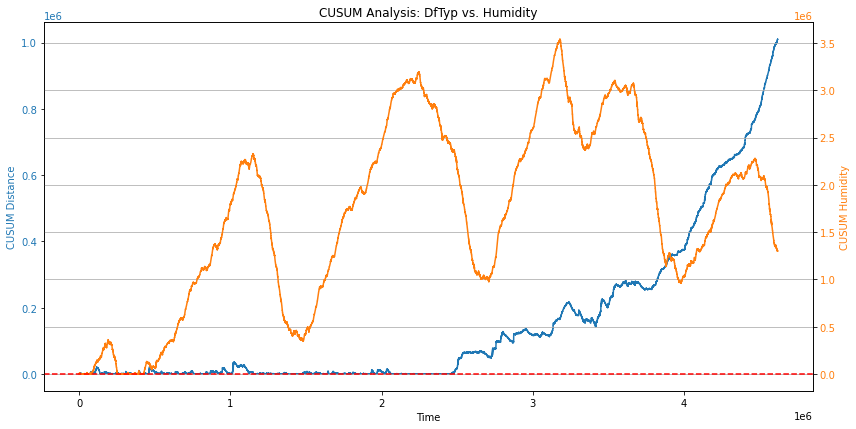

In [21]:
# Load your datasets (assuming they are already loaded into DataFrames named df_distance and df_humidity)
# Ensure both datasets have a common time index or timestamp column

# Example reference value for distance traveled (mean distance)
reference_distance = df['DfTyp(mins)'].mean()

# Calculate deviations from the reference value for distance traveled
deviations_distance = df['DfTyp(mins)'] - reference_distance

# Example reference value for humidity (mean humidity)
reference_humidity = df['Hum(%)'].mean()

# Calculate deviations from the reference value for humidity
deviations_humidity = df['Hum(%)'] - reference_humidity

# Choose appropriate threshold and stabilizer values for CUSUM analysis
T = 27  # Example threshold
c = 0.1  # Example stabilizer

# Initialize CUSUM values for distance traveled and humidity
cusum_distance = np.zeros(len(df))
cusum_humidity = np.zeros(len(df))

# Calculate CUSUM values for distance traveled
for i in range(1, len(df)):
    cusum_distance[i] = max(0, cusum_distance[i-1] + deviations_distance[i] - c)

# Calculate CUSUM values for humidity
for i in range(1, len(df)):
    cusum_humidity[i] = max(0, cusum_humidity[i-1] + deviations_humidity[i] - c)

# Plot CUSUM charts for distance traveled and humidity
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('CUSUM Distance', color=color)
ax1.plot(df.index, cusum_distance, label='CUSUM DfTyp', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('CUSUM Humidity', color=color)  
ax2.plot(df.index, cusum_humidity, label='CUSUM Humidity', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.axhline(y=T, color='red', linestyle='--', label=f'Threshold T={T}')
fig.tight_layout()  
plt.title('CUSUM Analysis: DfTyp vs. Humidity')
plt.grid(True)
plt.show()


## DfType versus Visibility

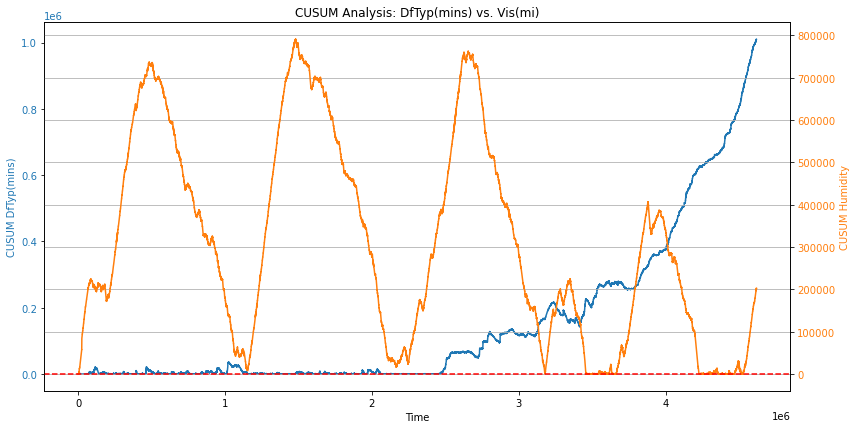

In [29]:
# Example reference value for distance traveled (mean distance)
reference_distance = df['DfTyp(mins)'].mean()

# Calculate deviations from the reference value for distance traveled
deviations_distance = df['DfTyp(mins)'] - reference_distance

# Example reference value for humidity (mean humidity)
reference_humidity = df['Vis(mi)'].mean()

# Calculate deviations from the reference value for humidity
deviations_humidity = df['Vis(mi)'] - reference_humidity

# Choose appropriate threshold and stabilizer values for CUSUM analysis
T = 1  # Example threshold
c = 0.1  # Example stabilizer

# Initialize CUSUM values for distance traveled and humidity
cusum_distance = np.zeros(len(df))
cusum_humidity = np.zeros(len(df))

# Calculate CUSUM values for distance traveled
for i in range(1, len(df)):
    cusum_distance[i] = max(0, cusum_distance[i-1] + deviations_distance[i] - c)

# Calculate CUSUM values for humidity
for i in range(1, len(df)):
    cusum_humidity[i] = max(0, cusum_humidity[i-1] + deviations_humidity[i] - c)

# Plot CUSUM charts for distance traveled and humidity
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('CUSUM DfTyp(mins)', color=color)
ax1.plot(df.index, cusum_distance, label='CUSUM DfTyp(mins)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('CUSUM Humidity', color=color)  
ax2.plot(df.index, cusum_humidity, label='CUSUM Humidity', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.axhline(y=T, color='red', linestyle='--', label=f'Threshold T={T}')
fig.tight_layout()  
plt.title('CUSUM Analysis: DfTyp(mins) vs. Vis(mi)')
plt.grid(True)
plt.show()
